<a href="https://colab.research.google.com/github/abdullah-621/Machine-Learning/blob/main/Feature_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Standardization***

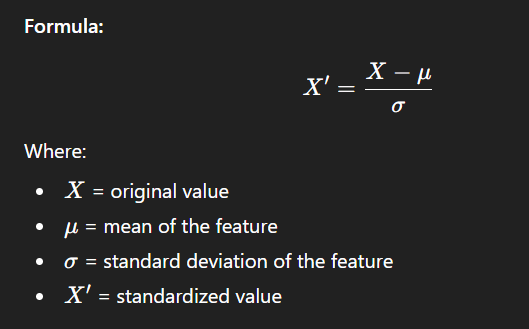

In [4]:
import pandas as pd
import numpy as np


In [44]:
# Manually Standardization

import pandas as pd

# Example Data
data = {'Height': [150, 160, 170, 180, 190],
        'Weight': [50, 60, 70, 80, 90]}

df = pd.DataFrame(data)
print(df)

# Apply Standardization

df['Height'] = (df['Height'] - df['Height'].mean()) / df['Height'].std()
df['Weight'] = (df['Weight'] - df['Weight'].mean()) / df['Weight'].std()


print(df)

   Height  Weight
0     150      50
1     160      60
2     170      70
3     180      80
4     190      90
     Height    Weight
0 -1.264911 -1.264911
1 -0.632456 -0.632456
2  0.000000  0.000000
3  0.632456  0.632456
4  1.264911  1.264911


In [66]:
# Using Sklearn
from sklearn.preprocessing import StandardScaler
data = {'Height': [150, 160, 170, 180, 190],
        'Weight': [50, 60, 70, 80, 90]}

df = pd.DataFrame(data)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pd.DataFrame(df_scaled, columns = df.columns)


,Height,Weight
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


# ***Min Max Scaler***
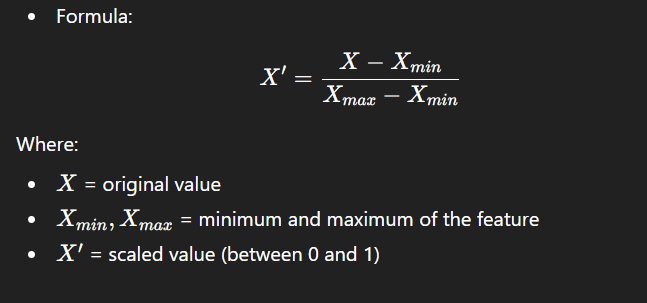

In [69]:
# Manually

data = {'Height': [150, 160, 170, 180, 190],
        'Weight': [50, 60, 70, 80, 90]}

df = pd.DataFrame(data)

df['Height'] = (df['Height'] - df['Height'].min()) / (df['Height'].max() - df['Height'].min())
df['Weight'] = (df['Weight'] - df['Weight'].min()) / (df['Weight'].max() - df['Height'].min())
df

,Height,Weight
0,0.00,0.000000
1,0.25,0.111111
2,0.50,0.222222
3,0.75,0.333333
4,1.00,0.444444


In [71]:
# Using sklearn
from sklearn.preprocessing import MinMaxScaler
data = {'Height': [150, 160, 170, 180, 190],
        'Weight': [50, 60, 70, 80, 90]}

df = pd.DataFrame(data)
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

pd.DataFrame(df_scaled, columns = df.columns)


,Height,Weight
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


# ***Robust Scaler***
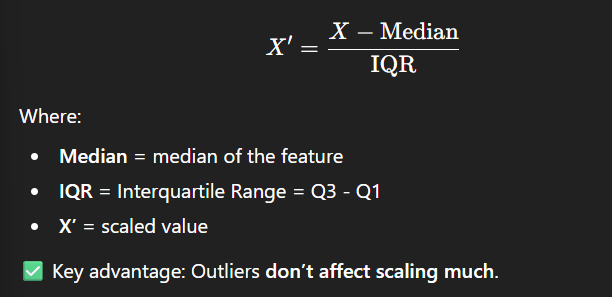

In [74]:
from sklearn.preprocessing import RobustScaler
data = {'Height': [150, 160, 170, 180, 190],
        'Weight': [50, 60, 70, 80, 90]}

df = pd.DataFrame(data)

scaler = RobustScaler()

df_scaled = scaler.fit_transform(df)


pd.DataFrame(df_scaled, columns = df.columns)



,Height,Weight
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,1.0,1.0


# ***Log Transformation***

In [76]:
data = {'Height': [150, 160, 170, 180, 190],
        'Weight': [50, 60, 70, 80, 90]}

df = pd.DataFrame(data)

df['Height_log'] = np.log(df['Height'])
df

,Height,Weight,Height_log
0,150,50,5.010635
1,160,60,5.075174
2,170,70,5.135798
3,180,80,5.192957
4,190,90,5.247024


In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt


# Example skewed data
data = {
    'Income': [20000, 25000, 30000, 35000, 1000000],
    'price': [20000, 25000, 30000, 35000, 1000000],
    'salary': [20000, 25000, 30000, 35000, 1000000]
    }  # last one is outlier
df = pd.DataFrame(data)

log_transformer = FunctionTransformer(np.log1p)
df['Income_log'] = log_transformer.fit_transform(df[['Income']])
df



,Income,price,salary,Income_log
0,20000,20000,20000,9.903538
1,25000,25000,25000,10.126671
2,30000,30000,30000,10.308986
3,35000,35000,35000,10.463132
4,1000000,1000000,1000000,13.815512


In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt


# Example skewed data
data = {
    'Income': [20000, 25000, 30000, 35000, 1000000],
    'price': [20000, 25000, 30000, 35000, 1000000],
    'salary': [20000, 25000, 30000, 35000, 1000000]
    }

df = pd.DataFrame(data)

log_transformer = FunctionTransformer(np.log1p)

for col in df.columns:
  df["log_"+col] = log_transformer.fit_transform(df[[col]])

df



,Income,price,salary,log_Income,log_price,log_salary
0,20000,20000,20000,9.903538,9.903538,9.903538
1,25000,25000,25000,10.126671,10.126671,10.126671
2,30000,30000,30000,10.308986,10.308986,10.308986
3,35000,35000,35000,10.463132,10.463132,10.463132
4,1000000,1000000,1000000,13.815512,13.815512,13.815512


# Robust Scaler

In [100]:
from sklearn.preprocessing import LabelEncoder, RobustScaler, MaxAbsScaler
from pandas.api.types import is_numeric_dtype

In [99]:
df = pd.read_csv("/content/titanic.csv", usecols=['Sex', 'Fare','Age'])
df.head()

# Rs = RobustScaler()
# Le = LabelEncoder()

for col in df.columns:
  if is_numeric_dtype(df[col]):
    Rs = RobustScaler()
    df["RS_"+col] = Rs.fit_transform(df[[col]])
  else:
    Le = LabelEncoder()
    df["Le_"+col] = Le.fit_transform(df[col])

df

,Sex,Age,Fare,Le_Sex,RS_Age,RS_Fare
0,male,22.0,7.2500,1,-0.335664,-0.312011
1,female,38.0,71.2833,0,0.559441,2.461242
2,female,26.0,7.9250,0,-0.111888,-0.282777
3,female,35.0,53.1000,0,0.391608,1.673732
4,male,35.0,8.0500,1,0.391608,-0.277363
...,...,...,...,...,...,...
886,male,27.0,13.0000,1,-0.055944,-0.062981
887,female,19.0,30.0000,0,-0.503497,0.673281
888,female,NaN,23.4500,0,NaN,0.389604
889,male,26.0,30.0000,1,-0.111888,0.673281


# Max absolute Scaler

In [102]:
df = pd.read_csv("/content/titanic.csv", usecols=['Sex', 'Fare','Age'])
df.head()

# Rs = RobustScaler()
# Le = LabelEncoder()

for col in df.columns:
  if is_numeric_dtype(df[col]):
    Rs = RobustScaler()
    df["RS_"+col] = Rs.fit_transform(df[[col]])

    Mas = MaxAbsScaler()
    df['Mas_'+col] = Mas.fit_transform(df[[col]])
  else:
    Le = LabelEncoder()
    df["Le_"+col] = Le.fit_transform(df[col])

df

,Sex,Age,Fare,Le_Sex,RS_Age,Mas_Age,RS_Fare,Mas_Fare
0,male,22.0,7.2500,1,-0.335664,0.2750,-0.312011,0.014151
1,female,38.0,71.2833,0,0.559441,0.4750,2.461242,0.139136
2,female,26.0,7.9250,0,-0.111888,0.3250,-0.282777,0.015469
3,female,35.0,53.1000,0,0.391608,0.4375,1.673732,0.103644
4,male,35.0,8.0500,1,0.391608,0.4375,-0.277363,0.015713
...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,1,-0.055944,0.3375,-0.062981,0.025374
887,female,19.0,30.0000,0,-0.503497,0.2375,0.673281,0.058556
888,female,NaN,23.4500,0,NaN,NaN,0.389604,0.045771
889,male,26.0,30.0000,1,-0.111888,0.3250,0.673281,0.058556
